In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import datetime as dt
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('/Users/matthewgittings/Flatiron/Phase_4_Project/Instagram_Data.csv')

In [3]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Posted']=df['Date Posted'].dt.strftime('%d-%m-%Y')
# removing time from the date posted
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df1 = df.drop(columns = ['Year','Month','Day','Hour','Minute','Type'])
df2 = df1.groupby(by=['Date Posted']).sum()
ts = df2.fillna(method='bfill')
df_monthly = df2.resample('MS')
monthly_mean = df_monthly.mean()
ts1 = monthly_mean.fillna(method='bfill')
df_weekly = df2.resample('W-MON')
weekly_mean = df_weekly.mean()
ts2 = weekly_mean.fillna(method='bfill')

In [4]:
def stationarity_check(TS):
    
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

# Weekly

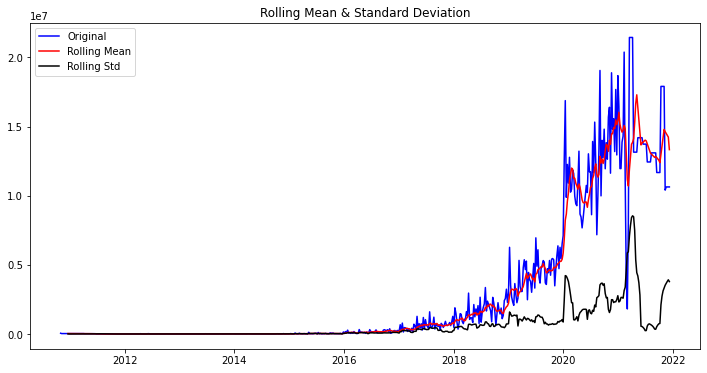

Results of Dickey-Fuller Test: 

Test Statistic                   0.753479
p-value                          0.990847
#Lags Used                      18.000000
Number of Observations Used    561.000000
Critical Value (1%)             -3.442060
Critical Value (5%)             -2.866706
Critical Value (10%)            -2.569521
dtype: float64


In [5]:
stationarity_check(ts2['Likes'])

# Monthly

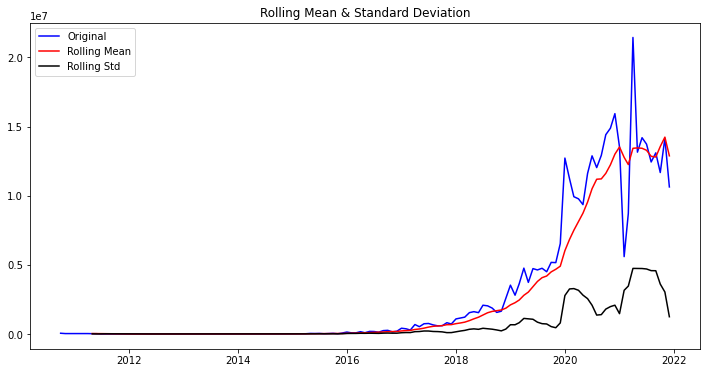

Results of Dickey-Fuller Test: 

Test Statistic                  -0.496194
p-value                          0.892757
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [6]:
stationarity_check(ts1['Likes'])

# Daily

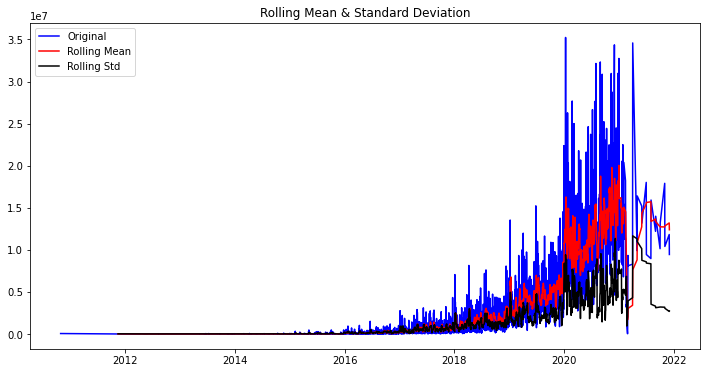

Results of Dickey-Fuller Test: 

Test Statistic                   -0.765560
p-value                           0.829030
#Lags Used                       28.000000
Number of Observations Used    2878.000000
Critical Value (1%)              -3.432624
Critical Value (5%)              -2.862545
Critical Value (10%)             -2.567305
dtype: float64


In [7]:
stationarity_check(ts['Likes'])

# log and square root transform

## daily

/Users/matthewgittings/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


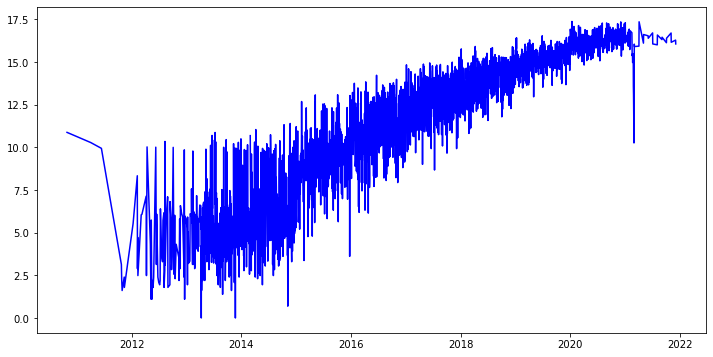

In [8]:
ts_log = np.log(ts['Likes'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

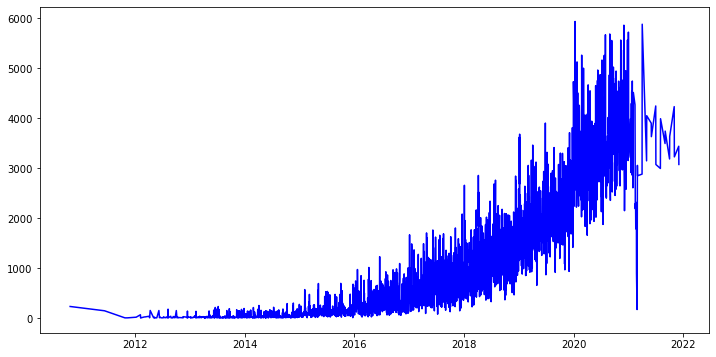

In [9]:
ts_sqrt = np.sqrt(ts['Likes'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

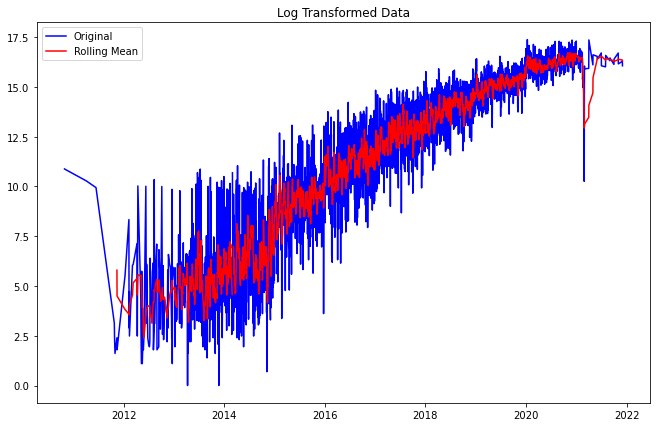

In [10]:
roll_mean = np.log(ts['Likes']).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(ts['Likes']), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [11]:
data_minus_roll_mean = np.log(ts['Likes']) - roll_mean
data_minus_roll_mean.head(10)

Date Posted
2010-10-28         NaN
2011-04-04         NaN
2011-06-14         NaN
2011-10-25         NaN
2011-10-27         NaN
2011-10-30         NaN
2011-11-13   -3.394325
2011-11-14   -2.702493
2012-01-11    1.717352
2012-02-08    4.748038
Name: Likes, dtype: float64

In [12]:
data_minus_roll_mean.dropna(inplace=True)

<AxesSubplot:xlabel='Date Posted'>

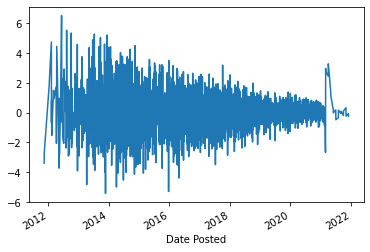

In [13]:
data_minus_roll_mean.plot()

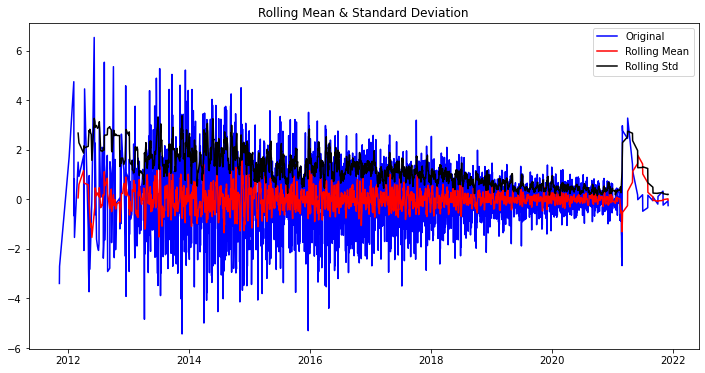

Results of Dickey-Fuller Test: 

Test Statistic                -1.738568e+01
p-value                        5.043075e-30
#Lags Used                     2.800000e+01
Number of Observations Used    2.865000e+03
Critical Value (1%)           -3.432635e+00
Critical Value (5%)           -2.862549e+00
Critical Value (10%)          -2.567307e+00
dtype: float64


In [14]:
stationarity_check(data_minus_roll_mean)

## Extremely small p-value using daily periodicity 

## Weekly

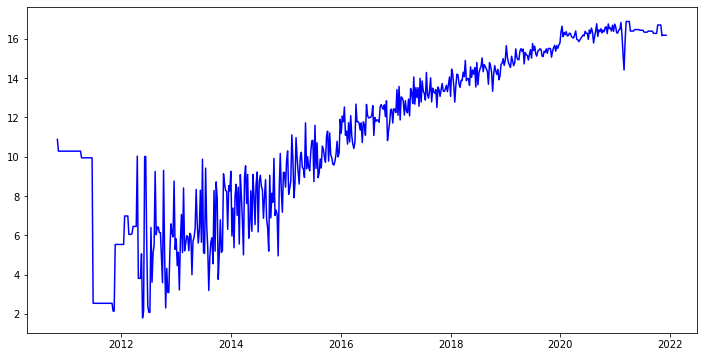

In [15]:
ts_log = np.log(ts2['Likes'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

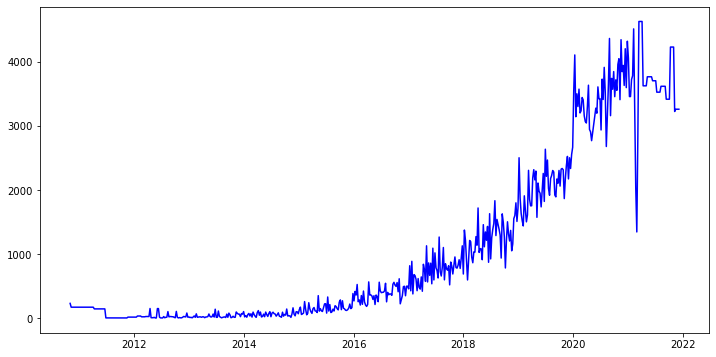

In [16]:
ts_sqrt = np.sqrt(ts2['Likes'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

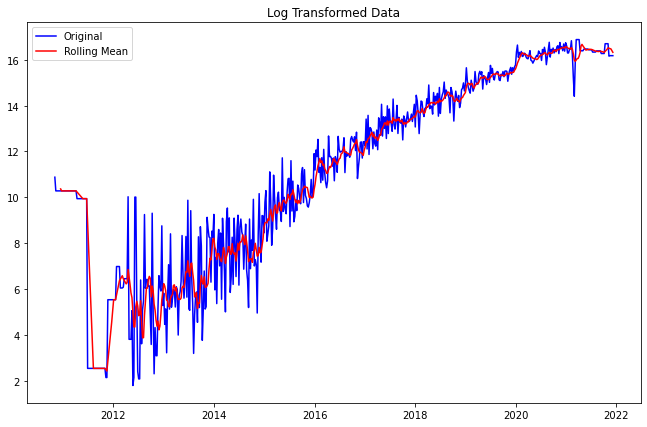

In [17]:
roll_mean = np.log(ts2['Likes']).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(ts2['Likes']), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [18]:
data_minus_roll_mean2 = np.log(ts2['Likes']) - roll_mean
data_minus_roll_mean2.head(10)

Date Posted
2010-11-01             NaN
2010-11-08             NaN
2010-11-15             NaN
2010-11-22             NaN
2010-11-29             NaN
2010-12-06             NaN
2010-12-13   -8.523451e-02
2010-12-20   -1.776357e-15
2010-12-27   -1.776357e-15
2011-01-03   -1.776357e-15
Freq: W-MON, Name: Likes, dtype: float64

In [19]:
data_minus_roll_mean2.dropna(inplace=True)

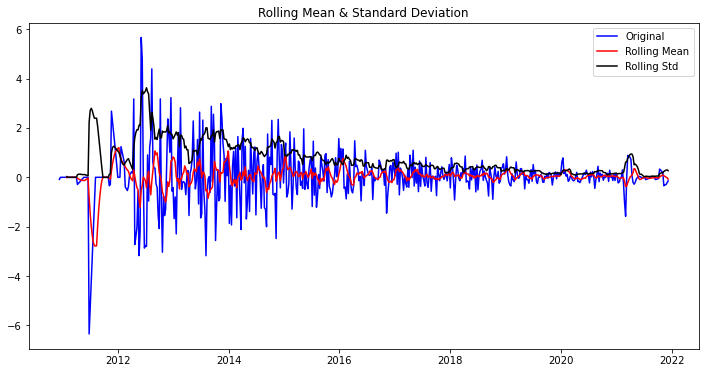

Results of Dickey-Fuller Test: 

Test Statistic                -7.201615e+00
p-value                        2.357426e-10
#Lags Used                     9.000000e+00
Number of Observations Used    5.640000e+02
Critical Value (1%)           -3.441998e+00
Critical Value (5%)           -2.866678e+00
Critical Value (10%)          -2.569506e+00
dtype: float64


In [20]:
stationarity_check(data_minus_roll_mean2)

# Still a small enough p-value to reject the null hypothesis but larger than the daily periodicity.

## Monthly

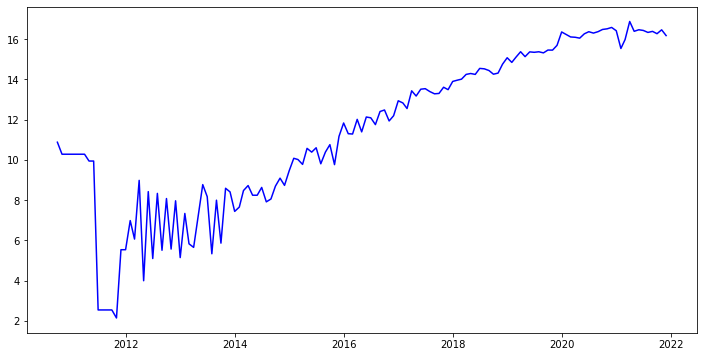

In [21]:
ts_log = np.log(ts1['Likes'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

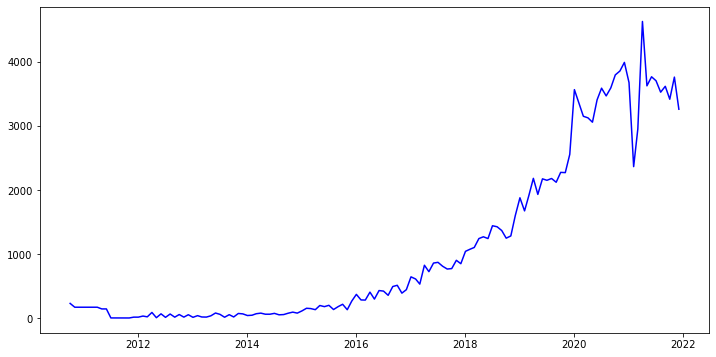

In [22]:
ts_sqrt = np.sqrt(ts1['Likes'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

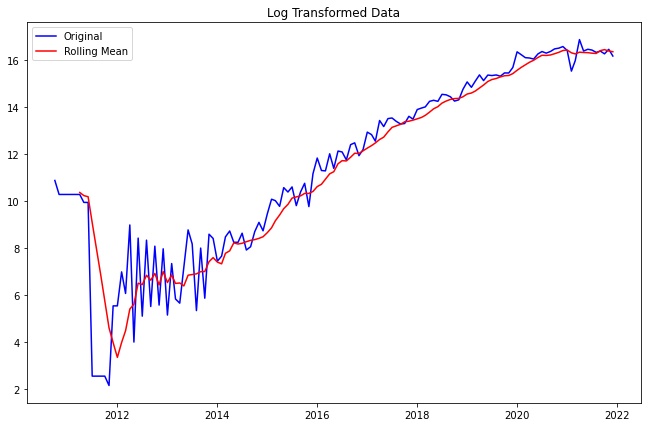

In [23]:
roll_mean = np.log(ts1['Likes']).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(ts1['Likes']), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [24]:
data_minus_roll_mean1 = np.log(ts1['Likes']) - roll_mean
data_minus_roll_mean1.head(10)

Date Posted
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01         NaN
2011-04-01   -0.085235
2011-05-01   -0.290741
2011-06-01   -0.242284
2011-07-01   -6.539020
Freq: MS, Name: Likes, dtype: float64

In [25]:
data_minus_roll_mean1.dropna(inplace=True)

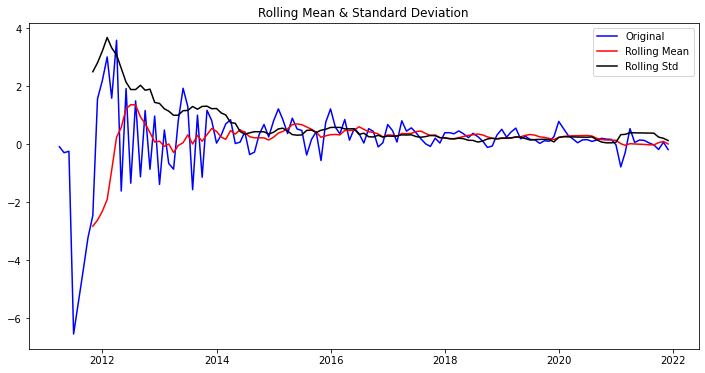

Results of Dickey-Fuller Test: 

Test Statistic                  -5.309626
p-value                          0.000005
#Lags Used                       2.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


In [26]:
stationarity_check(data_minus_roll_mean1)

# Monthly has the largest p-value. Going to proceed with the daily period. 

## Exp roll mean

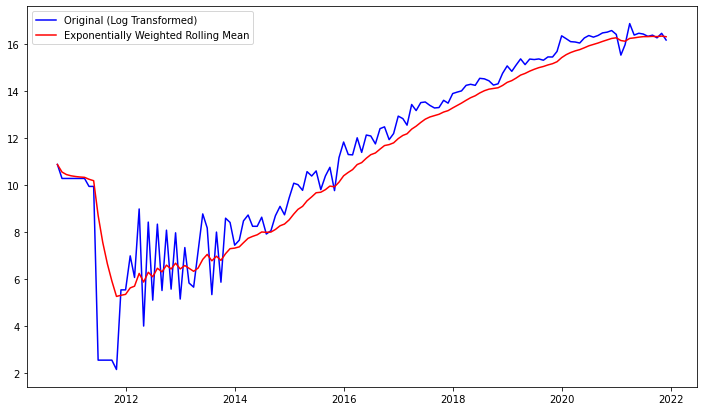

In [27]:
exp_roll_mean = np.log(ts1['Likes']).ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(ts1['Likes']), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)



<AxesSubplot:xlabel='Date Posted'>

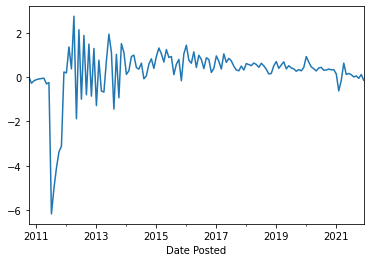

In [28]:
data_minus_exp_roll_mean = np.log(ts1['Likes']) - exp_roll_mean 

# Plot the time series
data_minus_exp_roll_mean.plot()

In [29]:
data_minus_exp_roll_mean.head(10)

Date Posted
2010-10-01    0.000000
2010-11-01   -0.272538
2010-12-01   -0.165576
2011-01-01   -0.112889
2011-02-01   -0.081898
2011-03-01   -0.061741
2011-04-01   -0.047762
2011-05-01   -0.304871
2011-06-01   -0.243453
2011-07-01   -6.168408
Freq: MS, Name: Likes, dtype: float64

In [30]:
data_minus_exp_roll_mean.dropna(inplace=True)

In [31]:
data_minus_exp_roll_mean

Date Posted
2010-10-01    0.000000
2010-11-01   -0.272538
2010-12-01   -0.165576
2011-01-01   -0.112889
2011-02-01   -0.081898
                ...   
2021-08-01    0.010380
2021-09-01    0.052084
2021-10-01   -0.052802
2021-11-01    0.117453
2021-12-01   -0.141724
Freq: MS, Name: Likes, Length: 135, dtype: float64

In [32]:
data_minus_exp_roll_mean.isna().sum()

0

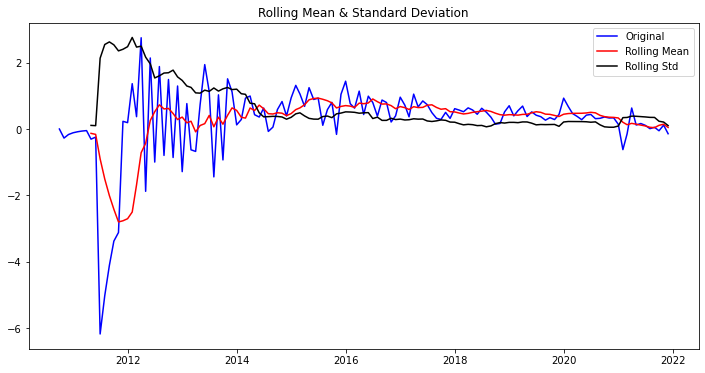

Results of Dickey-Fuller Test: 

Test Statistic                  -4.534117
p-value                          0.000171
#Lags Used                       4.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
stationarity_check(data_minus_exp_roll_mean)

# Differencing w/ roll mean

In [34]:
data_diff = data_minus_exp_roll_mean.diff(periods=12)
data_diff.dropna(inplace=True)
data_diff.head()

Date Posted
2011-10-01   -3.374035
2011-11-01   -2.841913
2011-12-01    0.396517
2012-01-01    0.304636
2012-02-01    1.446544
Freq: MS, Name: Likes, dtype: float64

<AxesSubplot:xlabel='Date Posted'>

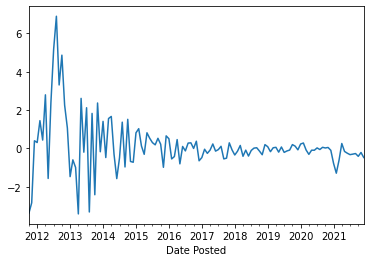

In [35]:
data_diff.plot()

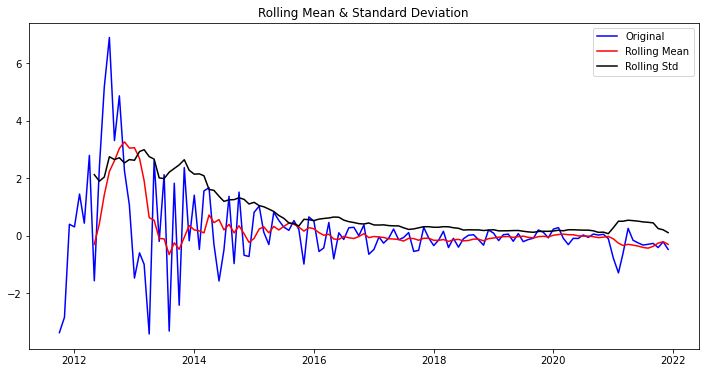

Results of Dickey-Fuller Test: 

Test Statistic                -5.739063e+00
p-value                        6.337681e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.090000e+02
Critical Value (1%)           -3.491818e+00
Critical Value (5%)           -2.888444e+00
Critical Value (10%)          -2.581120e+00
dtype: float64


In [36]:
stationarity_check(data_diff)

In [37]:
data_diff1 = data_minus_roll_mean1.diff(periods=12)
data_diff1.dropna(inplace=True)
data_diff1.head()

Date Posted
2012-04-01    3.670438
2012-05-01   -1.321329
2012-06-01    2.163012
2012-07-01    5.196623
2012-08-01    6.928386
Freq: MS, Name: Likes, dtype: float64

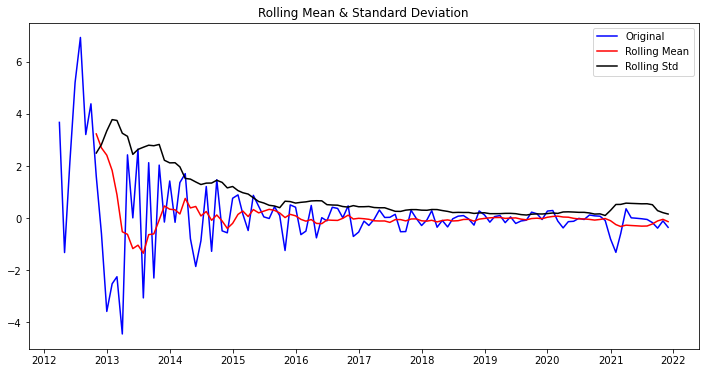

Results of Dickey-Fuller Test: 

Test Statistic                  -3.697710
p-value                          0.004145
#Lags Used                      13.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


In [38]:
stationarity_check(data_diff1)

In [39]:
#data_diff3 = data_minus_exp_roll_mean.diff(periods=12)
#data_diff3.dropna(inplace=True)
#data_diff3.head()

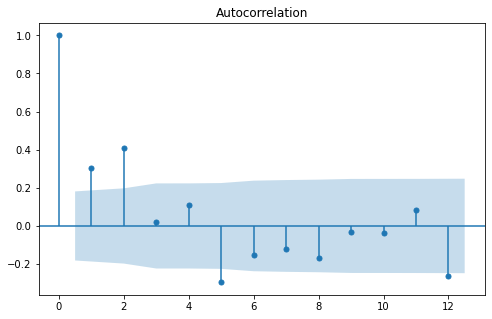

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,5))
plot_acf(data_diff1,ax=ax, lags=12);

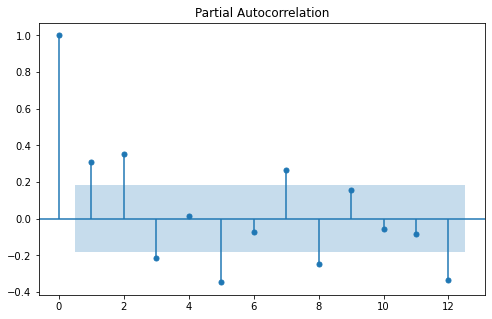

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,5))
plot_pacf(data_diff1,ax=ax, lags=12);

In [42]:
from statsmodels.tsa.arima_model import ARMA

# Fit an ARMA(1,0) model
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  Likes   No. Observations:                  123
Model:                     ARMA(2, 1)   Log Likelihood                -193.534
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 13 May 2022   AIC                            397.068
Time:                        09:34:32   BIC                            411.128
Sample:                    10-01-2011   HQIC                           402.779
                         - 12-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0784      0.241      0.325      0.745      -0.394       0.551
ar.L1.Likes    -0.1965      0.110     -1.780      0.075      -0.413       0.020
ar.L2.Likes     0.5457      0.079      6.896    

/Users/matthewgittings/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [43]:
print(res_arma.params)

const          0.078428
ar.L1.Likes   -0.196490
ar.L2.Likes    0.545739
ma.L1.Likes    0.510128
dtype: float64


In [52]:
mod_arma = ARMA(data_diff1, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  Likes   No. Observations:                  117
Model:                     ARMA(2, 1)   Log Likelihood                -189.682
Method:                       css-mle   S.D. of innovations              1.221
Date:                Fri, 13 May 2022   AIC                            389.364
Time:                        09:57:18   BIC                            403.175
Sample:                    04-01-2012   HQIC                           394.971
                         - 12-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1376      0.236      0.583      0.560      -0.325       0.600
ar.L1.Likes    -0.2367      0.116     -2.045      0.041      -0.463      -0.010
ar.L2.Likes     0.5180      0.081      6.359    

/Users/matthewgittings/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
